<a href="https://colab.research.google.com/github/CSCCNY/final-project-recomposeclassics/blob/main/Hannah_DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Recompose Classics : **Data Preprocessing**
Hannah Do
April 22nd, 2021


---


##### **Summary**

1. Conversion of **midi** to **wav** files :

 *fluidsynth*


2. Conversion of **wav** files to **spectograms** :

  *librosa*


---

**Mount from Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


**Get folder with Chopin classics only**

In [108]:
import os
import matplotlib.pyplot as plt

#for loading and visualizing audio files
import librosa
import librosa.display

#to play audio
import IPython.display as ipd

audio_fpath = "/content/gdrive/My Drive/Classics_DNN/unzipped_classics/"
audio_clips = os.listdir(audio_fpath+'chopin/')
print("No. of .midi files in audio folder = ",len(audio_clips))

No. of .midi files in audio folder =  49


**Imports to convert midi files into wav files - fluidsynth**

In [122]:
!sudo apt install fluidsynth
!cp /usr/share/sounds/sf2/FluidR3_GM.sf2 ./font.sf2

!cp /content/gdrive/My\ Drive/Classics_DNN/unzipped_classics/chopin/*.mid /content/mids/

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fluidsynth is already the newest version (1.1.9-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


**Change of directory to 'content' during 'midi to wav' conversion and back to google drive folder to avoid shell script error**

In [125]:

i=0
for i in range(len(audio_clips)):
  ! fluidsynth -ni font.sf2 {'/content/mids/'+audio_clips[i]} -F {'/content/wavs/'+os.path.splitext(audio_clips[i])[0]+'.wav'} -r 44100
  print(os.path.splitext(audio_clips[i])[0]+'.wav file downloaded \n')
  i += 1


FluidSynth version 1.1.9
Copyright (C) 2000-2018 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of E-mu Systems, Inc.

Rendering audio to file '/content/wavs/chp_op18.wav'..
chp_op31.wav file downloaded 

FluidSynth version 1.1.9
Copyright (C) 2000-2018 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of E-mu Systems, Inc.

Rendering audio to file '/content/wavs/chp_op31.wav'..
chpn-p1.wav file downloaded 

FluidSynth version 1.1.9
Copyright (C) 2000-2018 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of E-mu Systems, Inc.

Rendering audio to file '/content/wavs/chpn-p1.wav'..
chpn-p10.wav file downloaded 

FluidSynth version 1.1.9
Copyright (C) 2000-2018 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of E-mu Systems, Inc.

Rendering audio to file '/content/wavs/chpn-p10.wav'

IndexError: ignored

In [126]:
!cp /content/wavs/*wav /content/gdrive/My\ Drive/Classics_DNN/unzipped_classics/chopin_wavs2

**Open through librosa as numpy array**

In [128]:
audio_fpath = '/content/gdrive/My Drive/Classics_DNN/unzipped_classics/chopin_wavs2/'
audio_clips = os.listdir(audio_fpath)

x, sr = librosa.load(audio_fpath+audio_clips[0], sr=44100)

print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(4918720,) 44100


In [129]:
print()

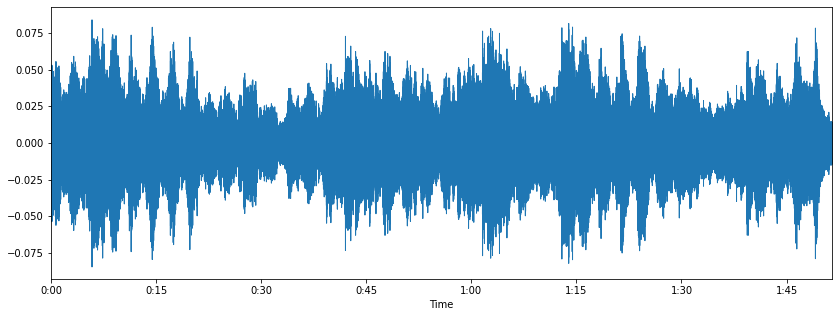

In [130]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

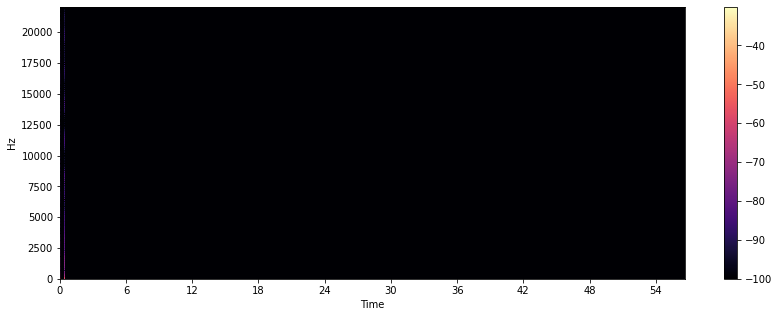

In [87]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()